In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("/home/user/Downloads/Car_sales.csv")

In [38]:
# 1. Read top five values
print(df.head())

    Manufacturer              Model  Sales in thousands 4-year resale value  \
0  Acura          Integra                        16.919               16.36   
1  Acura          TL                             39.384              19.875   
2  Acura          CL                             14.114              18.225   
3  Acura          RL                              8.588              29.725   
4  Audi           A4                             20.397              22.255   

  Vehicle type Price in thousands Engine size Horsepower Wheelbase Width  \
0    Passenger               21.5         1.8        140     101.2  67.3   
1    Passenger               28.4         3.2        225     108.1  70.3   
2    Passenger                  .         3.2        225     106.9  70.6   
3    Passenger                 42         3.5        210     114.6  71.4   
4    Passenger              23.99         1.8        150     102.6  68.2   

  Length Curb weight Fuel capacity Fuel efficiency Latest Launch  
0

In [39]:
# 2. Print dataframe info (data types of each column)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales in thousands   157 non-null    float64
 3   4-year resale value  157 non-null    object 
 4   Vehicle type         157 non-null    object 
 5   Price in thousands   157 non-null    object 
 6   Engine size          157 non-null    object 
 7   Horsepower           157 non-null    object 
 8   Wheelbase            157 non-null    object 
 9   Width                157 non-null    object 
 10  Length               157 non-null    object 
 11  Curb weight          157 non-null    object 
 12  Fuel capacity        157 non-null    object 
 13  Fuel efficiency      157 non-null    object 
 14  Latest Launch        157 non-null    object 
dtypes: float64(1), object(14)
memory usage: 

In [10]:
# 3. Print number of rows and columns
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 157
Number of columns: 15


In [40]:
# 4. Drop duplicate rows (if any)
df = df.drop_duplicates()

In [41]:
# 5. Print number of rows and columns after dropping duplicates
print("Number of rows after dropping duplicates:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows after dropping duplicates: 157
Number of columns: 15


In [42]:
# 6. Print summary statistics for numerical variables
print(df.describe())

       Sales in thousands
count          157.000000
mean            52.998076
std             68.029422
min              0.110000
25%             14.114000
50%             29.450000
75%             67.956000
max            540.561000


In [43]:
# 7. Print number of missing values in each column
print(df.isnull().sum())

Manufacturer           0
Model                  0
Sales in thousands     0
4-year resale value    0
Vehicle type           0
Price in thousands     0
Engine size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb weight            0
Fuel capacity          0
Fuel efficiency        0
Latest Launch          0
dtype: int64


In [44]:
# 8. Drop the column with the most missing values
#df = df.drop(columns=[df.isnull().sum().idxmax()])
print(df)

      Manufacturer              Model  Sales in thousands 4-year resale value  \
0    Acura          Integra                        16.919               16.36   
1    Acura          TL                             39.384              19.875   
2    Acura          CL                             14.114              18.225   
3    Acura          RL                              8.588              29.725   
4    Audi           A4                             20.397              22.255   
..             ...                ...                 ...                 ...   
152  Volvo          V40                             3.545                   .   
153  Volvo          S70                            15.245                   .   
154  Volvo          V70                            17.531                   .   
155  Volvo          C70                             3.493                   .   
156  Volvo          S80                            18.969                   .   

    Vehicle type Price in t

In [45]:
# 9. Drop rows with categorical missing values
df = df.dropna(subset=df.select_dtypes(include=['object']).columns)
print(df)

      Manufacturer              Model  Sales in thousands 4-year resale value  \
0    Acura          Integra                        16.919               16.36   
1    Acura          TL                             39.384              19.875   
2    Acura          CL                             14.114              18.225   
3    Acura          RL                              8.588              29.725   
4    Audi           A4                             20.397              22.255   
..             ...                ...                 ...                 ...   
152  Volvo          V40                             3.545                   .   
153  Volvo          S70                            15.245                   .   
154  Volvo          V70                            17.531                   .   
155  Volvo          C70                             3.493                   .   
156  Volvo          S80                            18.969                   .   

    Vehicle type Price in t

In [46]:
# 10. Import the rows with numerical missing values
cols=df.select_dtypes(include=['number'])
r=df[cols.isnull().any(axis=1)]
print(r)

Empty DataFrame
Columns: [Manufacturer, Model, Sales in thousands, 4-year resale value, Vehicle type, Price in thousands, Engine size, Horsepower, Wheelbase, Width, Length, Curb weight, Fuel capacity, Fuel efficiency, Latest Launch]
Index: []


In [47]:
# 11. Sort the data w.r.t price and find details of the most and least expensive cars
df_sorted = df.sort_values(by="Price in thousands")
print("Least Expensive Car:\n", df_sorted.iloc[0])
print("\nMost Expensive Car:\n", df_sorted.iloc[-1])


Least Expensive Car:
 Manufacturer               Acura        
Model                  CL               
Sales in thousands                14.114
4-year resale value               18.225
Vehicle type                   Passenger
Price in thousands                     .
Engine size                          3.2
Horsepower                           225
Wheelbase                          106.9
Width                               70.6
Length                               192
Curb weight                         3.47
Fuel capacity                       17.2
Fuel efficiency                       26
Latest Launch                   1-Apr-14
Name: 2, dtype: object

Most Expensive Car:
 Manufacturer               Hyundai      
Model                  Accent           
Sales in thousands                41.184
4-year resale value                 5.86
Vehicle type                   Passenger
Price in thousands                 9.699
Engine size                          1.5
Horsepower                     

In [48]:
# 12. Function to find min and max values of any column
def find_min_max(df, column_name):
    return df[column_name].min(),df[column_name].max()

In [49]:
#13. Call the above function to find min max of horse
#power, length, fuel efficiency
# Find min and max for Horsepower, Length, and Fuel Efficiency
min_max_values = df[["Horsepower", "Length", "Fuel efficiency"]].agg(["min", "max"])
min_max_values


,Horsepower,Length,Fuel efficiency
min,.,.,.
max,92,224.5,45


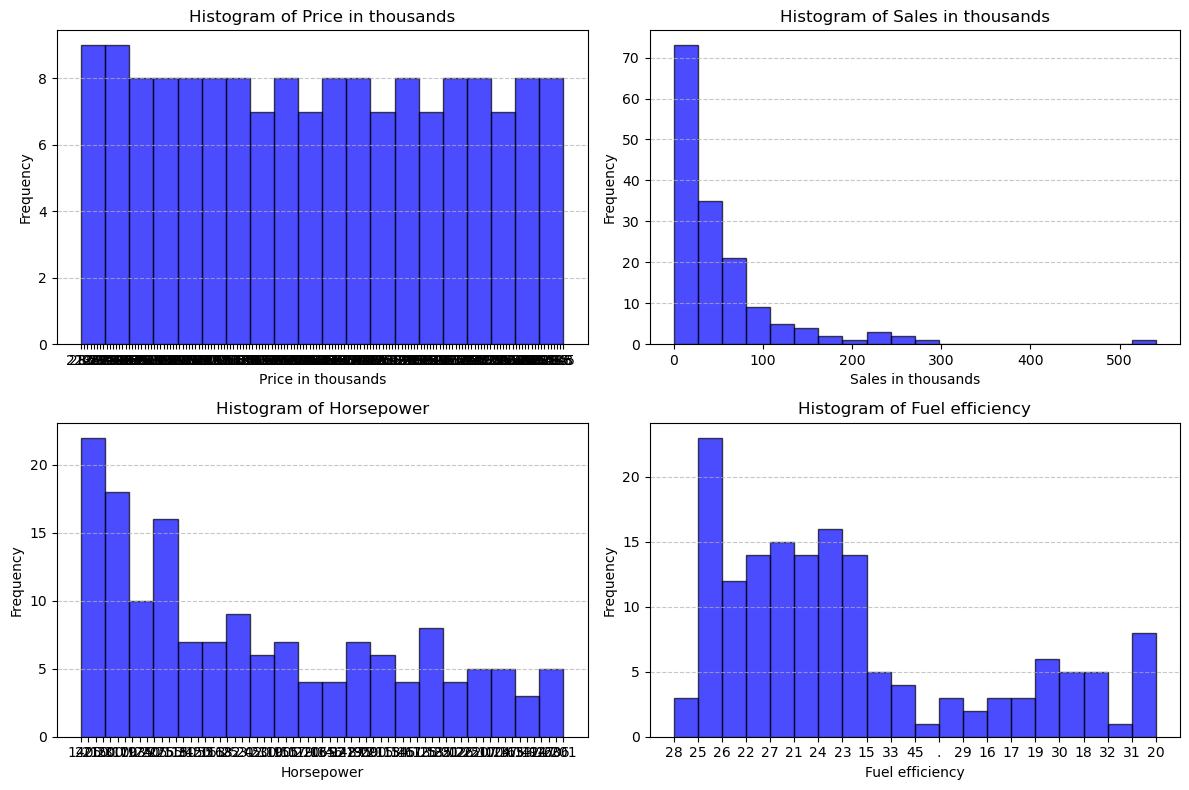

In [50]:
#14. Plot histogram of continuous numerical variable :
#price,sales,hoursepower,fuelefficiency
import matplotlib.pyplot as plt

# List of numerical variables to plot
hist_columns = ["Price in thousands", "Sales in thousands", "Horsepower", "Fuel efficiency"]

# Plot histograms
plt.figure(figsize=(12, 8))
for i, col in enumerate(hist_columns, 1):
    plt.subplot(2, 2, i)
    plt.hist(df[col].dropna(), bins=20, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


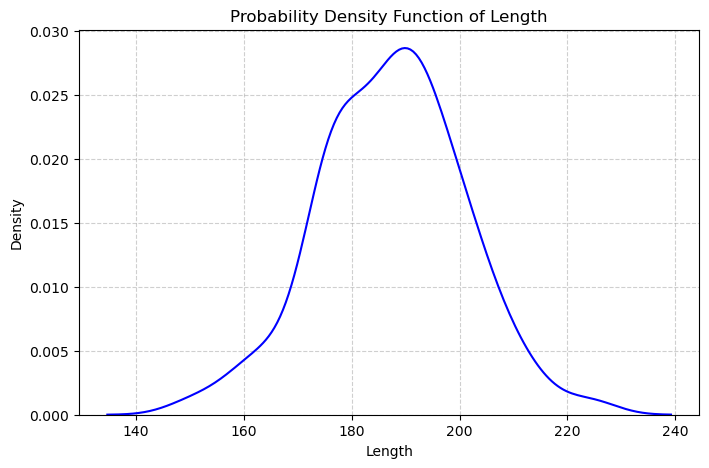

In [31]:
# # Plot the probability density function for Length
#df["Length"].dtype
# Check for unique values in the "Length" column to identify anomalies
#df["Length"].unique()

df["Length"] = pd.to_numeric(df["Length"], errors='coerce')

# Verify the datatype again after conversion
df["Length"].dtype

# Plot the probability density function for Length again after conversion
plt.figure(figsize=(8, 5))
sns.kdeplot(df["Length"].dropna(), color="blue")
plt.title("Probability Density Function of Length")
plt.xlabel("Length")
plt.ylabel("Density")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [52]:
#16 Count the number of cars grouped by Manufacturer again
manufacturer_counts = df["Manufacturer"].value_counts()

# Display the counts
manufacturer_counts


Manufacturer
Ford             11
Dodge            11
Chevrolet         9
Mercedes-Benz     9
Toyota            9
Chrysler          7
Mitsubishi        7
Nissan            7
Mercury           6
Oldsmobile        6
Lexus             6
Pontiac           6
Volvo             6
Volkswagen        6
Cadillac          5
Honda             5
Saturn            5
Plymouth          4
Buick             4
Acura             4
Audi              3
BMW               3
Lincoln           3
Porsche           3
Jeep              3
Hyundai           3
Saab              2
Subaru            2
Jaguar            1
Infiniti          1
Name: count, dtype: int64

In [61]:
# Convert all columns to numeric where possible (ignoring errors)
#df = df.apply(pd.to_numeric, errors='coerce')

# Recheck numerical columns after conversion
#numerical_df = df.select_dtypes(include=['number'])

# Display structure again
#numerical_df.info()

#17. Select all numerical variables
# Select only numerical variables (int64 and float64)
# Select only numerical variables (int64 and float64)
# Re-check and clean column names, ensuring spaces are removed
df.columns = df.columns.str.strip()

# Select only numerical columns again
numerical_df = df.select_dtypes(include=['number'])

# Display all numerical columns properly
numerical_df.head()



,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
0,NaN,NaN,16.919,16.360,NaN,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,NaN
1,NaN,NaN,39.384,19.875,NaN,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,NaN
2,NaN,NaN,14.114,18.225,NaN,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,NaN
3,NaN,NaN,8.588,29.725,NaN,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,NaN
4,NaN,NaN,20.397,22.255,NaN,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,NaN


In [62]:
#18. Print correlation coefficient value of price and sales
# Calculate the correlation coefficient between Price and Sales
correlation_value = numerical_df["Price in thousands"].corr(numerical_df["Sales in thousands"])

# Display the correlation coefficient
correlation_value


-0.3047344541294122

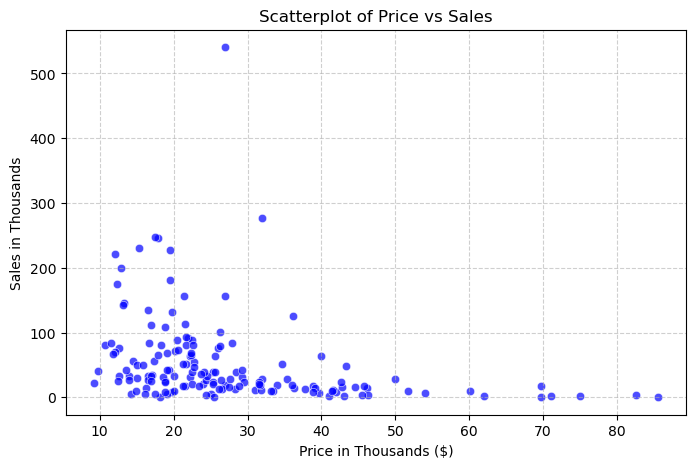

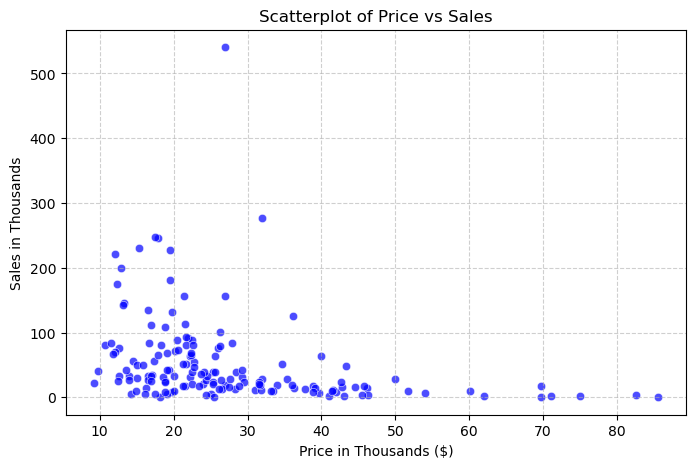

In [64]:
#19. Plot correlation of price and sales using scatterplot
# Scatterplot of Price vs Sales to visualize correlation
plt.figure(figsize=(8, 5))
sns.scatterplot(x=numerical_df["Price in thousands"], y=numerical_df["Sales in thousands"], alpha=0.7, color="blue")

# Add labels and title
plt.title("Scatterplot of Price vs Sales")
plt.xlabel("Price in Thousands ($)")
plt.ylabel("Sales in Thousands")
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()
import matplotlib.pyplot as plt
import seaborn as sns

# Scatterplot of Price vs Sales
plt.figure(figsize=(8, 5))
sns.scatterplot(x=numerical_df["Price in thousands"], y=numerical_df["Sales in thousands"], alpha=0.7, color="blue")

# Add labels and title
plt.title("Scatterplot of Price vs Sales")
plt.xlabel("Price in Thousands ($)")
plt.ylabel("Sales in Thousands")
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


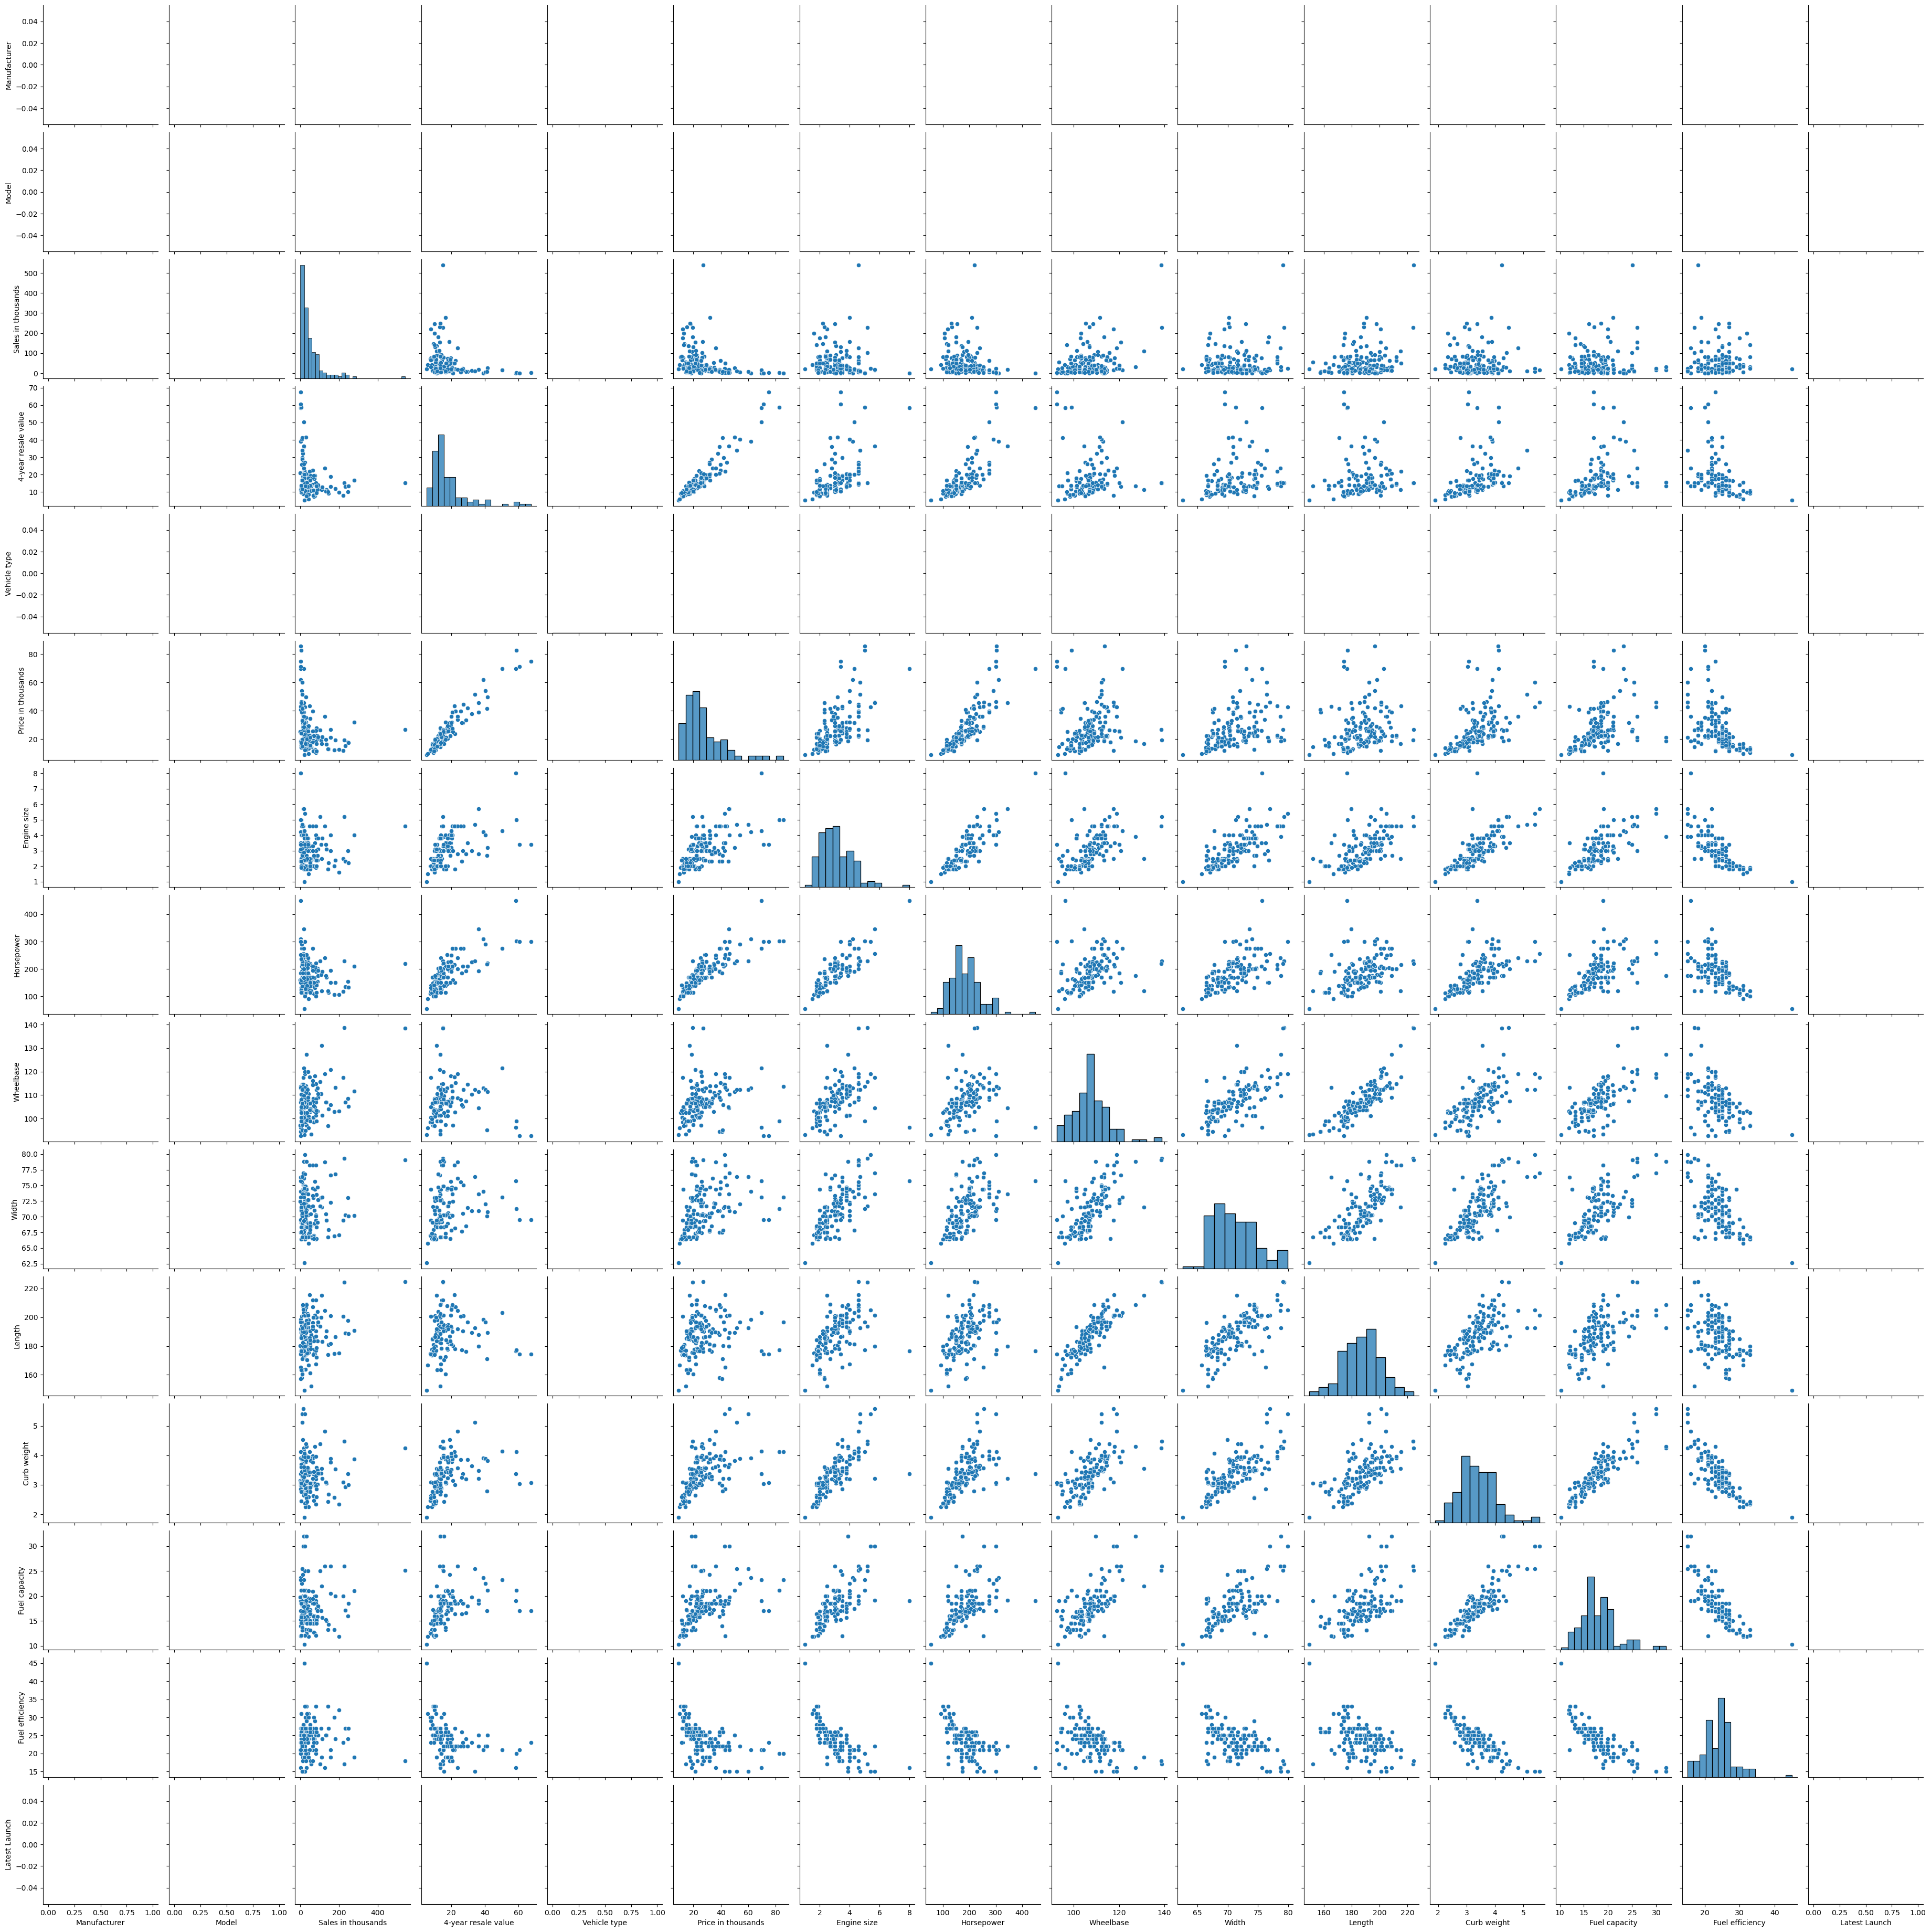

In [66]:
#20.Pair plot
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot of all numerical variables
sns.pairplot(numerical_df)

# Show the plot
plt.show()


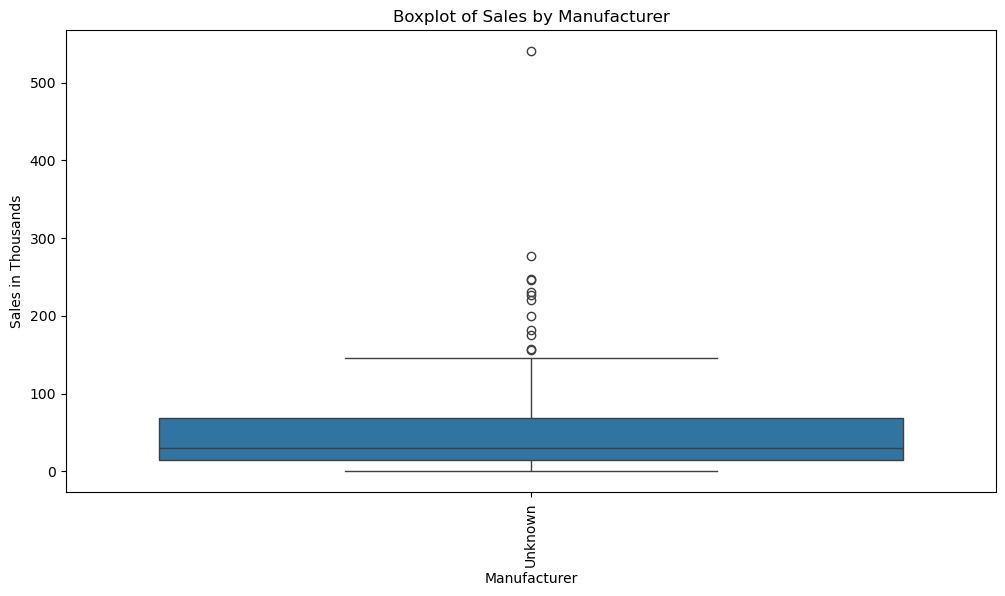

In [72]:
#21. Boxplot of sales of different manufacturer
#print(df[["Model", "Sales in thousands"]].isnull().sum())

#df["Manufacturer"] = df["Model"].apply(lambda x: x.split()[0] if isinstance(x, str) else "Unknown")
#print(df["Manufacturer"].unique())
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Manufacturer"], y=df["Sales in thousands"])
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.title("Boxplot of Sales by Manufacturer")
plt.xlabel("Manufacturer")
plt.ylabel("Sales in Thousands")
plt.show()


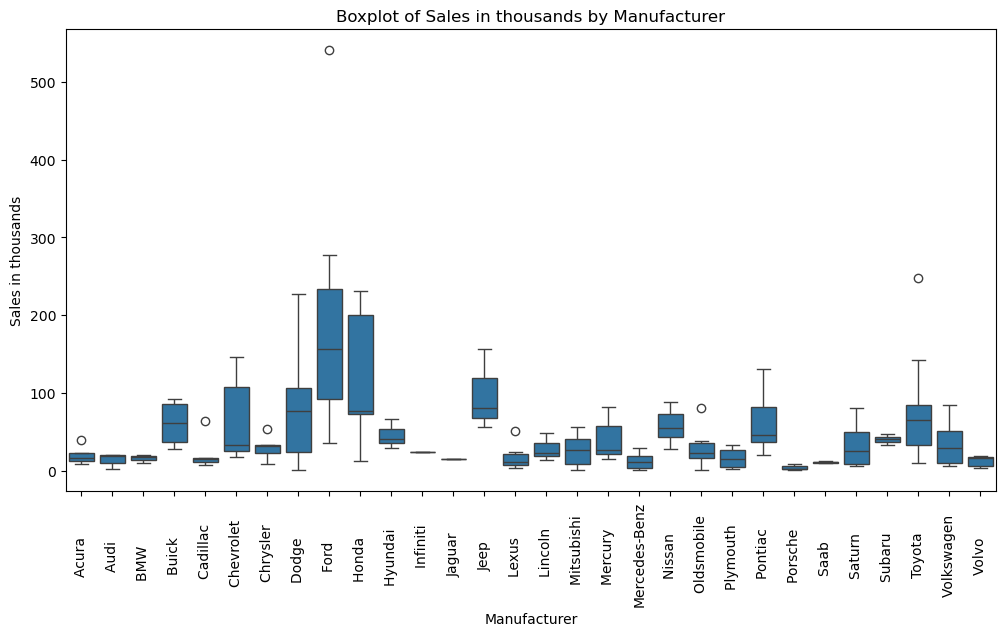

In [82]:
#22. Boxplot of other numerical variables w.r.t manufacture

df = pd.read_csv("/home/user/Downloads/Car_sales.csv")
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()

for col in numerical_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df["Manufacturer"], y=df[col])
    plt.xticks(rotation=90)
    plt.title(f"Boxplot of {col} by Manufacturer")
    plt.show()




In [83]:
#23. Divide the data into input and output y=sales in
#thousand, x=all other variables
# Define output variable (target)
y = df["Sales in thousands"]

# Define input variables (all other columns except 'Sales in thousands')
X = df.drop(columns=["Sales in thousands"])

# Check shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (157, 14)
Shape of y: (157,)


In [85]:
#24. Encode other categorical variables using label encoder
from sklearn.preprocessing import LabelEncoder
# Select only categorical columns
categorical_cols = X.select_dtypes(include=["object"]).columns
print("Categorical columns:", categorical_cols)
# Initialize LabelEncoder
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])  # Encode the column
    label_encoders[col] = le  # Store encoder for future use

# Check the transformed data
print(X.head())


Categorical columns: Index(['Manufacturer', 'Model', '4-year resale value', 'Vehicle type',
       'Price in thousands', 'Engine size', 'Horsepower', 'Wheelbase', 'Width',
       'Length', 'Curb weight', 'Fuel capacity', 'Fuel efficiency',
       'Latest Launch'],
      dtype='object')
   Manufacturer  Model  4-year resale value  Vehicle type  Price in thousands  \
0             0     79                   53             1                  59   
1             0    143                   70             1                 102   
2             0     25                   63             1                   0   
3             0    115                   87             1                 130   
4             1      8                   78             1                  77   

   Engine size  Horsepower  Wheelbase  Width  Length  Curb weight  \
0            4          17          5      9      15           18   
1           16          50         36     32      83           91   
2           16     

In [87]:
#25. Encode categorical variable vehicle type using one-hotencoder

from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Initialize OneHotEncoder (use sparse_output instead of sparse)
one_hot_encoder = OneHotEncoder(sparse_output=False, drop="first")

# Reshape and transform 'Vehicle type'
vehicle_type_encoded = one_hot_encoder.fit_transform(X[['Vehicle type']])

# Convert to DataFrame with appropriate column names
vehicle_type_df = pd.DataFrame(vehicle_type_encoded, columns=one_hot_encoder.get_feature_names_out(['Vehicle type']))

# Concatenate with original DataFrame, dropping the original 'Vehicle type' column
X = pd.concat([X.drop(columns=['Vehicle type']), vehicle_type_df], axis=1)

# Display the first few rows
print(X.head())



   Manufacturer  Model  4-year resale value  Price in thousands  Engine size  \
0             0     79                   53                  59            4   
1             0    143                   70                 102           16   
2             0     25                   63                   0           16   
3             0    115                   87                 130           19   
4             1      8                   78                  77            4   

   Horsepower  Wheelbase  Width  Length  Curb weight  Fuel capacity  \
0          17          5      9      15           18              8   
1          50         36     32      83           91             29   
2          50         29     35      80           85             29   
3          44         56     40      97          113             32   
4          22          9     16      34           39             23   

   Fuel efficiency  Latest Launch  Vehicle type_1  
0               14             42       

In [88]:
#26.Split the data set into train and test set 70% train set
#10% test set
from sklearn.model_selection import train_test_split

# Splitting data into 70% train, 10% test, and 20% validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 30% for test+val
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)  # 10% test, 20% val

# Print dataset shapes
print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)



Train set shape: (109, 14) (109,)
Validation set shape: (16, 14) (16,)
Test set shape: (32, 14) (32,)


In [ ]:
#27. Apply feature scaling on numerical variables